#### [ **본인 마지막 시각화 부분에 넣을 히트맵입니다** ]
- **색상표(cmap)와 사이즈(figsize)를 변경하지 마세요.**
- **본인 지표와 Diagnosis** 컬럼이 함께 있는 df를 사용하세요
- 코드 중 **dataDF만 본인 df로 바꾸시면** 됩니다.

In [7]:
# 필요 모듈
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [8]:
DF=pd.read_csv(r'C:\Users\gy931\OneDrive\Desktop\KDP-7\03.VISUAL\DATA\alzheimers_disease_data.csv')

In [10]:
DF1=DF.loc[:,'FamilyHistoryAlzheimers':'Hypertension']
Med_HisDF=pd.concat([DF1,DF['Diagnosis']],axis=1)

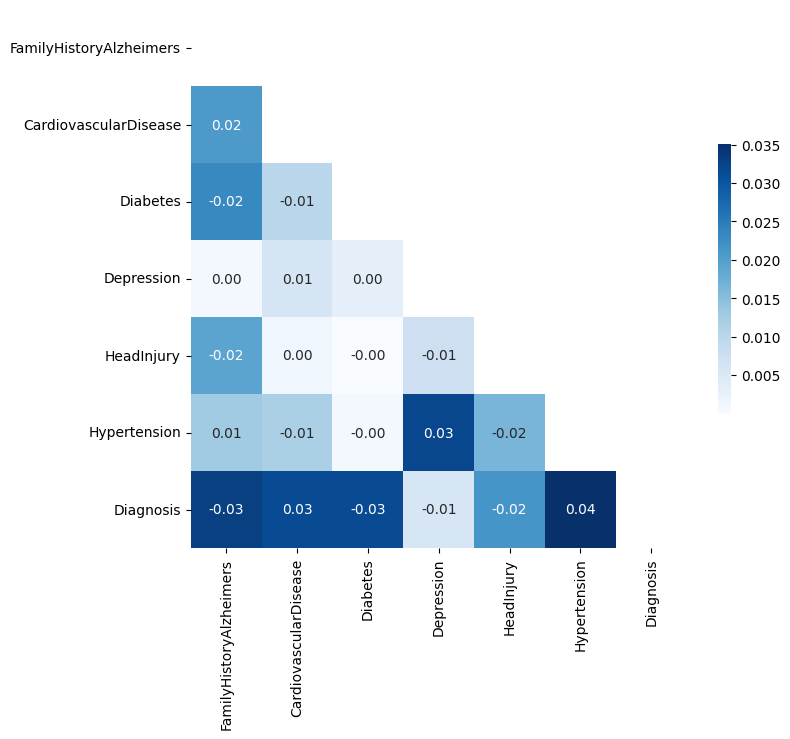

In [11]:
# 지표와 진단결과 상관관계 ->heatmap
# dataDF 자리에 본인 지표 부분 DF 대입
# Diagnosis 컬럼이 포함된 DF일 것!!

# 상관관계계수 계산
correlation = Med_HisDF.corr(numeric_only=True)

# 히트맵 모양 대각선으로 자르기
mask = np.triu(np.ones_like(correlation, dtype=bool))
# np.ones_like() 함수로 correlation과 동일한 모양과 크기를 가지는 모든 요소가 True인 배열을 생성
# np.triu() 함수는 상삼각 행렬(Upper triangular matrix)를 생성
# 즉, 대각선 및 그 위의 요소들은 True, 그 아래의 요소들은 False로 설정됨

# 상관관계계수 대입
plt.figure(figsize=(8, 7))
cmap=sns.color_palette("Blues", as_cmap=True)
sns.heatmap(correlation.abs(),   # 상관관계가 있는지 없는지 색상으로 확인 위해 절대값 사용
            cmap=cmap, cbar_kws={"shrink": .5}, # 절대값 사용하면 색상이 진할수록 관계가 있다는 것을 의미함
            mask=mask,annot=correlation, fmt=".2f")  # 히트맵 위에 표시되는 값은 부호가 있는 상관관계계수 값

plt.show()